# Convergence of upper and lower bound over time

Note that the events in the plot are only based on the upper bound iterations.

In [1]:
import pandas as pd
from _conf import PREPROCESSED_DATA

data = pd.read_json(PREPROCESSED_DATA)
# data = data.drop_duplicates(subset=["instance"])
data

num_vars  num_clauses baseline_alg baseline_alg_conf  runtime_baseline  \
0         854         1164    FIDE-YASA        t2_m1_null              2639   
1          28           40    FIDE-YASA        t2_m1_null               312   
2         334           92    FIDE-YASA        t2_m1_null               741   
3         326          499    FIDE-YASA        t2_m1_null               736   
4         326          499    FIDE-YASA        t2_m1_null               737   
..        ...          ...          ...               ...               ...   
225        23           35    FIDE-YASA        t2_m1_null               300   
226      1397        15692    FIDE-YASA        t2_m1_null             14082   
227      1245         3723    FIDE-YASA        t2_m1_null              4817   
228       557         4992    FIDE-YASA        t2_m1_null              2124   
229      1397        15692    FIDE-YASA        t2_m1_null             14061   

     baseline_sample_size                  path_to_baseline_sample  \
0                      30  2023-03-01_13-51-03/36_1_3_2_sample.csv   
1                      15  2023-03-01_13-51-03/12_1_3_4_sample.csv   
2                      19  2023-03-01_13-51-03/29_1_3_4_sample.csv   
3                      22  2023-03-01_13-51-03/28_1_3_1_sample.csv   
4                      22  2023-03-01_13-51-03/28_1_3_3_sample.csv   
..                    ...                                      ...   
225                    11   2023-03-01_13-51-03/9_1_3_5_sample.csv   
226                    91  2023-03-01_13-51-03/46_1_3_1_sample.csv   
227                    77  2023-03-01_13-51-03/42_1_3_4_sample.csv   
228                   400  2023-03-01_13-51-03/33_1_3_1_sample.csv   
229                    91  2023-03-01_13-51-03/46_1_3_3_sample.csv   

                              archive_path  \
0    ./EXTERNAL_INPUT/900_seconds_5_it.zip   
1    ./EXTERNAL_INPUT/900_seconds_5_it.zip   
2    ./EXTERNAL_INPUT/900_seconds_5_it.zip   
3    ./EXTERNAL_INPUT/900_seconds_5_it.zip   
4    ./EXTERNAL_INPUT/900_seconds_5_it.zip   
..                                     ...   
225  ./EXTERNAL_INPUT/900_seconds_5_it.zip   
226  ./EXTERNAL_INPUT/900_seconds_5_it.zip   
227  ./EXTERNAL_INPUT/900_seconds_5_it.zip   
228  ./EXTERNAL_INPUT/900_seconds_5_it.zip   
229  ./EXTERNAL_INPUT/900_seconds_5_it.zip   

                                            parameters  \
0    {'func': 'run_samplns', 'args': {'instance_nam...   
1    {'func': 'run_samplns', 'args': {'instance_nam...   
2    {'func': 'run_samplns', 'args': {'instance_nam...   
3    {'func': 'run_samplns', 'args': {'instance_nam...   
4    {'func': 'run_samplns', 'args': {'instance_nam...   
..                                                 ...   
225  {'func': 'run_samplns', 'args': {'instance_nam...   
226  {'func': 'run_samplns', 'args': {'instance_nam...   
227  {'func': 'run_samplns', 'args': {'instance_nam...   
228  {'func': 'run_samplns', 'args': {'instance_nam...   
229  {'func': 'run_samplns', 'args': {'instance_nam...   

                  instance_name  lower_bound  upper_bound  \
0                busybox-1_18_0           12           18   
1                     APL-Model            8            8   
2    toybox_2020-12-06_00-02-46            7           14   
3                        E-Shop            8           12   
4                        E-Shop            8           12   
..                          ...          ...          ...   
225                         APL            7            7   
226               FreeBSD-8_0_0           25           63   
227             eCos-3-0_i386pc           26           53   
228               fs_2017-05-22          396          396   
229               FreeBSD-8_0_0           28           68   

                                        iteration_info  time_used_by_yasa  \
0    [{'nbrhd_tuples': 141, 'nbrhd_confs': 1, 'iter...              2.639   
1    [{'nbrhd_tuples': 204, 'nbrhd_confs': 11, 'ite...              0.312   
2

In [2]:
from _conf import EXTERNAL_BOUNDS

best_lower_bound = (
    data.groupby(["instance_name"])["lower_bound"]
    .max()
    .reset_index()
    .rename(columns={"lower_bound": "best_lower_bound"})
)
best_lower_bound.to_json("./out/07_best_lower_bounds.json.zip")
best_lower_bound["internal_best_lower_bound"] = best_lower_bound["best_lower_bound"]
external_best_lb = (
    pd.concat([pd.read_csv(p) for p in EXTERNAL_BOUNDS])
    .groupby(["instance_name"])["best_lower_bound"]
    .max()
    .reset_index()
)
best_lower_bound = (
    pd.concat([best_lower_bound, external_best_lb])
    .groupby(["instance_name"])[["best_lower_bound", "internal_best_lower_bound"]]
    .max()
    .reset_index()
)
best_lower_bound

instance_name  best_lower_bound  internal_best_lower_bound
0                           APL                 7                        7.0
1                     APL-Model                 8                        8.0
2               BankingSoftware                28                       28.0
3                 BattleofTanks               256                      256.0
4                    ChatClient                 7                        7.0
5                          DMIE                16                       16.0
6                        E-Shop                10                        8.0
7                    EMBToolkit              1872                     1741.0
8                        FameDB                 8                        8.0
9                    FeatureIDE                 7                        7.0
10                FreeBSD-8_0_0                30                       29.0
11                          PPU                12                       12.0
12                     SafeBali                11                       11.0
13                  SortingLine                 9                        9.0
14                     TightVNC                 8                        8.0
15                       Violet                15                       14.0
16            WaterlooGenerated                82                       82.0
17                     XSEngine                32                       31.0
18                     aaed2000                51                       51.0
19                     am31_sim                28                       26.0
20             atlas_mips32_4kc                33                       33.0
21                        axTLS                10                       10.0
22                  berkeleyDB1                15                       15.0
23                  berkeleyDB2                12                       11.0
24               busybox-1_18_0                13                       12.0
25               busybox-1_29_2                20                       18.0
26  busybox_2007-01-24_09-14-09                21                       21.0
27  busybox_2020-12-16_21-53-05                19                       16.0
28                    calculate                 5                        5.0
29                          car                 5                        5.0
30                         dell                31                       31.0
31              eCos-3-0_i386pc                34                       33.0
32                       ea2468                31                       31.0
33                        email                 6                        6.0
34   fiasco_2017-09-26_11-30-56               225                      224.0
35   fiasco_2020-12-01_14-09-14               196                      196.0
36           financial_services              4304                     4148.0
37                fs_2017-05-22               396                      396.0
38                          gpl                16                       16.0
39              integrator_arm7                33                       32.0
40                          lcm                 6                        6.0
41  soletta_2015-06-26_18-38-56                24                       24.0
42   toybox_2006-10-31_23-30-06                 8                        8.0
43   toybox_2020-12-06_00-02-46                 8                        7.0
44   uclibc_2008-06-05_13-46-47               505                      505.0
45   uclibc_2020-12-24_11-54-53               365                      365.0

## Extend the data by some additional information on the best values

In [3]:
# Find the best values for each instance as reference.

# add them to the data as reference
data = data.merge(best_lower_bound, left_on="instance_name", right_on="instance_name")
data

num_vars  num_clauses baseline_alg baseline_alg_conf  runtime_baseline  \
0         854         1164    FIDE-YASA        t2_m1_null              2639   
1         854         1164    FIDE-YASA        t2_m1_null              2607   
2         854         1164    FIDE-YASA        t2_m1_null              2615   
3         854         1164    FIDE-YASA        t2_m1_null              2609   
4         854         1164    FIDE-YASA        t2_m1_null              2651   
..        ...          ...          ...               ...               ...   
225      1050          996    FIDE-YASA        t2_m1_null              4327   
226      1050          996    FIDE-YASA        t2_m1_null              4237   
227      1050          996    FIDE-YASA        t2_m1_null              4230   
228      1050          996    FIDE-YASA        t2_m1_null              4342   
229      1050          996    FIDE-YASA        t2_m1_null              4172   

     baseline_sample_size                  path_to_baseline_sample  \
0                      30  2023-03-01_13-51-03/36_1_3_2_sample.csv   
1                      30  2023-03-01_13-51-03/36_1_3_1_sample.csv   
2                      30  2023-03-01_13-51-03/36_1_3_4_sample.csv   
3                      30  2023-03-01_13-51-03/36_1_3_5_sample.csv   
4                      30  2023-03-01_13-51-03/36_1_3_3_sample.csv   
..                    ...                                      ...   
225                    45  2023-03-01_13-51-03/38_1_3_5_sample.csv   
226                    45  2023-03-01_13-51-03/38_1_3_1_sample.csv   
227                    45  2023-03-01_13-51-03/38_1_3_2_sample.csv   
228                    45  2023-03-01_13-51-03/38_1_3_3_sample.csv   
229                    45  2023-03-01_13-51-03/38_1_3_4_sample.csv   

                              archive_path  \
0    ./EXTERNAL_INPUT/900_seconds_5_it.zip   
1    ./EXTERNAL_INPUT/900_seconds_5_it.zip   
2    ./EXTERNAL_INPUT/900_seconds_5_it.zip   
3    ./EXTERNAL_INPUT/900_seconds_5_it.zip   
4    ./EXTERNAL_INPUT/900_seconds_5_it.zip   
..                                     ...   
225  ./EXTERNAL_INPUT/900_seconds_5_it.zip   
226  ./EXTERNAL_INPUT/900_seconds_5_it.zip   
227  ./EXTERNAL_INPUT/900_seconds_5_it.zip   
228  ./EXTERNAL_INPUT/900_seconds_5_it.zip   
229  ./EXTERNAL_INPUT/900_seconds_5_it.zip   

                                            parameters  \
0    {'func': 'run_samplns', 'args': {'instance_nam...   
1    {'func': 'run_samplns', 'args': {'instance_nam...   
2    {'func': 'run_samplns', 'args': {'instance_nam...   
3    {'func': 'run_samplns', 'args': {'instance_nam...   
4    {'func': 'run_samplns', 'args': {'instance_nam...   
..                                                 ...   
225  {'func': 'run_samplns', 'args': {'instance_nam...   
226  {'func': 'run_samplns', 'args': {'instance_nam...   
227  {'func': 'run_samplns', 'args': {'instance_nam...   
228  {'func': 'run_samplns', 'args': {'instance_nam...   
229  {'func': 'run_samplns', 'args': {'instance_nam...   

                   instance_name  lower_bound  upper_bound  \
0                 busybox-1_18_0           12           18   
1                 busybox-1_18_0           12           18   
2                 busybox-1_18_0           12           19   
3                 busybox-1_18_0           12           18   
4                 busybox-1_18_0           12           18   
..                           ...          ...          ...   
225  busybox_2020-12-16_21-53-05           15           23   
226  busybox_2020-12-16_21-53-05           14           23   
227  busybox_2020-12-16_21-53-05           10           24   
228  busybox_2020-12-16_21-53-05            9           23   
229  busybox_2020-12-16_21-53-05           16           23   

                                        iteration_info  time_used_by_yasa  \
0    [{'nbrhd_tuples': 141, 'nbrhd_confs': 1, 'iter...              2.639   
1    [{'nbrhd_tuples': 65, 'nbrhd_confs': 1, 'itera...            

## A look onto the data never hurts

In [4]:
data

num_vars  num_clauses baseline_alg baseline_alg_conf  runtime_baseline  \
0         854         1164    FIDE-YASA        t2_m1_null              2639   
1         854         1164    FIDE-YASA        t2_m1_null              2607   
2         854         1164    FIDE-YASA        t2_m1_null              2615   
3         854         1164    FIDE-YASA        t2_m1_null              2609   
4         854         1164    FIDE-YASA        t2_m1_null              2651   
..        ...          ...          ...               ...               ...   
225      1050          996    FIDE-YASA        t2_m1_null              4327   
226      1050          996    FIDE-YASA        t2_m1_null              4237   
227      1050          996    FIDE-YASA        t2_m1_null              4230   
228      1050          996    FIDE-YASA        t2_m1_null              4342   
229      1050          996    FIDE-YASA        t2_m1_null              4172   

     baseline_sample_size                  path_to_baseline_sample  \
0                      30  2023-03-01_13-51-03/36_1_3_2_sample.csv   
1                      30  2023-03-01_13-51-03/36_1_3_1_sample.csv   
2                      30  2023-03-01_13-51-03/36_1_3_4_sample.csv   
3                      30  2023-03-01_13-51-03/36_1_3_5_sample.csv   
4                      30  2023-03-01_13-51-03/36_1_3_3_sample.csv   
..                    ...                                      ...   
225                    45  2023-03-01_13-51-03/38_1_3_5_sample.csv   
226                    45  2023-03-01_13-51-03/38_1_3_1_sample.csv   
227                    45  2023-03-01_13-51-03/38_1_3_2_sample.csv   
228                    45  2023-03-01_13-51-03/38_1_3_3_sample.csv   
229                    45  2023-03-01_13-51-03/38_1_3_4_sample.csv   

                              archive_path  \
0    ./EXTERNAL_INPUT/900_seconds_5_it.zip   
1    ./EXTERNAL_INPUT/900_seconds_5_it.zip   
2    ./EXTERNAL_INPUT/900_seconds_5_it.zip   
3    ./EXTERNAL_INPUT/900_seconds_5_it.zip   
4    ./EXTERNAL_INPUT/900_seconds_5_it.zip   
..                                     ...   
225  ./EXTERNAL_INPUT/900_seconds_5_it.zip   
226  ./EXTERNAL_INPUT/900_seconds_5_it.zip   
227  ./EXTERNAL_INPUT/900_seconds_5_it.zip   
228  ./EXTERNAL_INPUT/900_seconds_5_it.zip   
229  ./EXTERNAL_INPUT/900_seconds_5_it.zip   

                                            parameters  \
0    {'func': 'run_samplns', 'args': {'instance_nam...   
1    {'func': 'run_samplns', 'args': {'instance_nam...   
2    {'func': 'run_samplns', 'args': {'instance_nam...   
3    {'func': 'run_samplns', 'args': {'instance_nam...   
4    {'func': 'run_samplns', 'args': {'instance_nam...   
..                                                 ...   
225  {'func': 'run_samplns', 'args': {'instance_nam...   
226  {'func': 'run_samplns', 'args': {'instance_nam...   
227  {'func': 'run_samplns', 'args': {'instance_nam...   
228  {'func': 'run_samplns', 'args': {'instance_nam...   
229  {'func': 'run_samplns', 'args': {'instance_nam...   

                   instance_name  lower_bound  upper_bound  \
0                 busybox-1_18_0           12           18   
1                 busybox-1_18_0           12           18   
2                 busybox-1_18_0           12           19   
3                 busybox-1_18_0           12           18   
4                 busybox-1_18_0           12           18   
..                           ...          ...          ...   
225  busybox_2020-12-16_21-53-05           15           23   
226  busybox_2020-12-16_21-53-05           14           23   
227  busybox_2020-12-16_21-53-05           10           24   
228  busybox_2020-12-16_21-53-05            9           23   
229  busybox_2020-12-16_21-53-05           16           23   

                                        iteration_info  time_used_by_yasa  \
0    [{'nbrhd_tuples': 141, 'nbrhd_confs': 1, 'iter...              2.639   
1    [{'nbrhd_tuples': 65, 'nbrhd_confs': 1, 'itera...            

The data field `iteration_info` contains a list of dicts for each iteration. This dict looks as follows:
```
{ 'nbrhd_tuples': 166,  # the tuples to be covered in this iteration
  'nbrhd_confs': 5,     # the number of configurations deleted from the sample
  'iteration': 0,       # the number of the iteration, in this case the first iteration
  'lb': 3.0,            # the current best lb (global)
  'ub': 23,             # the current best ub (global)
  'time': 1.0297019481658936,    # overall time at the end of this iteration
  'iteration_time': 0.48791050910949707,   # time in this iteration
  'events': [[0.0350489616394043, 'neighborhood_selected'],   # times of events in this iteration. Good for finding the culprit of long runtimes.
   [0.24133801460266113, 'local_cds_computed'],
   [0.29517436027526855, 'model_built'],
   [0.48662543296813965, 'model_optimized'],
   [0.48789548873901367, 'neighborhood_optimized'],
   [0.48791003227233887, 'global_lb_iteration_finished']]}
```

In [5]:
instance_infos = (
    data[["instance_name", "num_vars", "num_clauses"]]
    .drop_duplicates()
    .sort_values(by=["num_vars", "num_clauses"])
)
instance_infos

instance_name  num_vars  num_clauses
110                    calculate         9           15
140                          lcm         9           16
45                         email        10           17
55                    ChatClient        14           20
25    toybox_2006-10-31_23-30-06        16           13
185                          car        16           33
105                   FeatureIDE        19           27
165                       FameDB        22           40
60                           APL        23           35
35                      SafeBali        24           45
120                     TightVNC        28           39
5                      APL-Model        28           40
155                          gpl        38           99
180                  SortingLine        39           77
125                         dell        46          244
200                          PPU        52          109
150                  berkeleyDB1        76          147
40                         axTLS        96          183
135                       Violet       101          203
95                   berkeleyDB2       119          346
220  soletta_2015-06-26_18-38-56       129          192
85                 BattleofTanks       144          769
195              BankingSoftware       176          280
65    fiasco_2017-09-26_11-30-56       230         1181
70    fiasco_2020-12-01_14-09-14       258         1542
90    uclibc_2008-06-05_13-46-47       263         1699
20    uclibc_2020-12-24_11-54-53       272         1670
15                        E-Shop       326          499
10    toybox_2020-12-06_00-02-46       334           92
50                          DMIE       366          627
190  busybox_2007-01-24_09-14-09       540          429
145                fs_2017-05-22       557         4992
75             WaterlooGenerated       580          879
160           financial_services       771         7238
0                 busybox-1_18_0       854         1164
205               busybox-1_29_2      1018          997
225  busybox_2020-12-16_21-53-05      1050          996
215                     am31_sim      1178         2747
30                    EMBToolkit      1179         5414
115             atlas_mips32_4kc      1229         2875
210              eCos-3-0_i386pc      1245         3723
100              integrator_arm7      1272         2980
130                     XSEngine      1273         2942
80                      aaed2000      1298         3036
170                FreeBSD-8_0_0      1397        15692
175                       ea2468      1408         3319

## Extract the iteration data from each optimization

Bring them in a format that can easily be plotted by seaborn.

In [6]:
import pandas as pd


# Collect the data from the iteration_info events.
class EventCollector:
    def __init__(self):
        self.events = {
            "time": [],
            "val": [],
            "type": [],
            "instance": [],
            "path": [],
            # "alg": [],
            "initial_sample_size": [],
            "y": [],
            "final": [],
        }

    def __call__(self, row):
        it_data = row["iteration_info"]

        def add(val, lbub, time, final=False):
            if time > 900:
                return
            self.events["time"].append((time + row["time_used_by_yasa"]) / 60)
            self.events["val"].append(val)
            self.events["type"].append(lbub)
            self.events["instance"].append(row["instance_name"])
            # self.events["alg"].append(row["baseline_alg"])
            self.events["path"].append(row["path_to_baseline_sample"])
            self.events["initial_sample_size"].append(row["baseline_sample_size"])
            self.events["y"].append(100 * (val / row["best_lower_bound"]))
            self.events["final"].append(final)

        # add a zero entry
        add(0, "Lower", 0)
        add(row["baseline_sample_size"], "Upper", 0)
        for event in it_data:
            add(
                event["lb"],
                "Lower",
                event["time"],
                final=event["lb"] == row["lower_bound"],
            )
            add(
                event["ub"],
                "Upper",
                event["time"],
                final=event["ub"] == row["upper_bound"],
            )


ec = EventCollector()
data.sort_values(by=["num_vars", "num_clauses"]).apply(ec, axis=1)
t = pd.DataFrame(ec.events)

In [7]:
t

time   val   type   instance  \
0       0.002883   0.0  Lower  calculate   
1       0.002883   9.0  Upper  calculate   
2       0.003473   5.0  Lower  calculate   
3       0.003473   5.0  Upper  calculate   
4       0.002967   0.0  Lower  calculate   
...          ...   ...    ...        ...   
10889  13.645729  46.0  Upper     ea2468   
10890  14.704405  27.0  Lower     ea2468   
10891  14.704405  46.0  Upper     ea2468   
10892  15.020611  27.0  Lower     ea2468   
10893  15.020611  46.0  Upper     ea2468   

                                          path  initial_sample_size  \
0       2023-03-01_13-51-03/1_1_3_5_sample.csv                    9   
1       2023-03-01_13-51-03/1_1_3_5_sample.csv                    9   
2       2023-03-01_13-51-03/1_1_3_5_sample.csv                    9   
3       2023-03-01_13-51-03/1_1_3_5_sample.csv                    9   
4       2023-03-01_13-51-03/1_1_3_3_sample.csv                    9   
...                                        ...                  ...   
10889  2023-03-01_13-51-03/47_1_3_2_sample.csv                   77   
10890  2023-03-01_13-51-03/47_1_3_2_sample.csv                   77   
10891  2023-03-01_13-51-03/47_1_3_2_sample.csv                   77   
10892  2023-03-01_13-51-03/47_1_3_2_sample.csv                   77   
10893  2023-03-01_13-51-03/47_1_3_2_sample.csv                   77   

                y  final  
0        0.000000  False  
1      180.000000  False  
2      100.000000   True  
3      100.000000   True  
4        0.000000  False  
...           ...    ...  
10889  148.387097   True  
10890   87.096774   True  
10891  148.387097   True  
10892   87.096774   True  
10893  148.387097   True  

[10894 rows x 8 columns]

## Feature Models on which SampLNS did not finish a single iteration in time

These models have very large initial samples (more than a thousand configurations), for which the current implementation is not equipped.
The problem lies more in the data structures than the actual approach.
They should be feasible with some extra effort in making those data structures more efficient.

*A lower bound is still computed for these instances, but without iterations of SampLNS, only the final lower bound is saved after SampLNS aborted.*

In [8]:
t_ = t.groupby(["instance", "path"])["time"].max().reset_index()
unsolved_instances = t_[t_["time"] == 0]["instance"].unique().tolist()
unsolved_instances

[]

## Plot the convergence for all other models.

In [9]:
solved_instances = [
    x for x in instance_infos["instance_name"].tolist() if x not in unsolved_instances
]

In [10]:
# Prepare plotting
import seaborn as sns

sns.set_theme()
import matplotlib.pyplot as plt

In [11]:
def plot_lb_ub_progress(data, axis, xmax=16, single_instance=False):
    instance_descr = "Model"
    bound_descr = "Bound"
    t_ = data.rename(columns={"instance": instance_descr, "type": bound_descr})
    if single_instance:
        sns.lineplot(
            data=t_,
            ax=axis,
            x="time",
            y="y",
            style=bound_descr,
            hue="path",
            units="path",
            estimator=None,
            markers=False,
            palette="tab10",
            drawstyle="steps-post",
            dashes=[(1.5, 1.5), (3, 3)],
            legend=False,
        )
        sns.scatterplot(
            data=t_[t_[bound_descr] == "Upper"],
            ax=axis,
            x="time",
            y="y",
            hue="path",
            marker="X",
            palette="tab10",
            legend=False,
        )
    else:
        sns.lineplot(
            data=t_,
            ax=axis,
            x="time",
            y="y",
            style=bound_descr,
            hue=instance_descr,
            units="path",
            estimator=None,
            markers=False,
            palette="tab10",
            drawstyle="steps-post",
            dashes=[(1.5, 1.5), (3, 3)],
        )
        sns.scatterplot(
            data=t_[t_[bound_descr] == "Upper"],
            ax=axis,
            x="time",
            y="y",
            hue=instance_descr,
            marker="X",
            palette="tab10",
            legend=False,
        )
    axis.set_xlim(-0.1, xmax)
    axis.set_xlabel("Time in (min)")
    axis.set_ylabel("Relative to best lower bound (%)")
    if single_instance:
        axis.set_title(
            f"Convergence of upper and lower bound - {data['instance'].tolist()[0]}"
        )
    else:
        axis.set_title("Convergence of upper and lower bound")

### All models in one plot

This shows us that most models really make quick progress and only a few take a little longer.

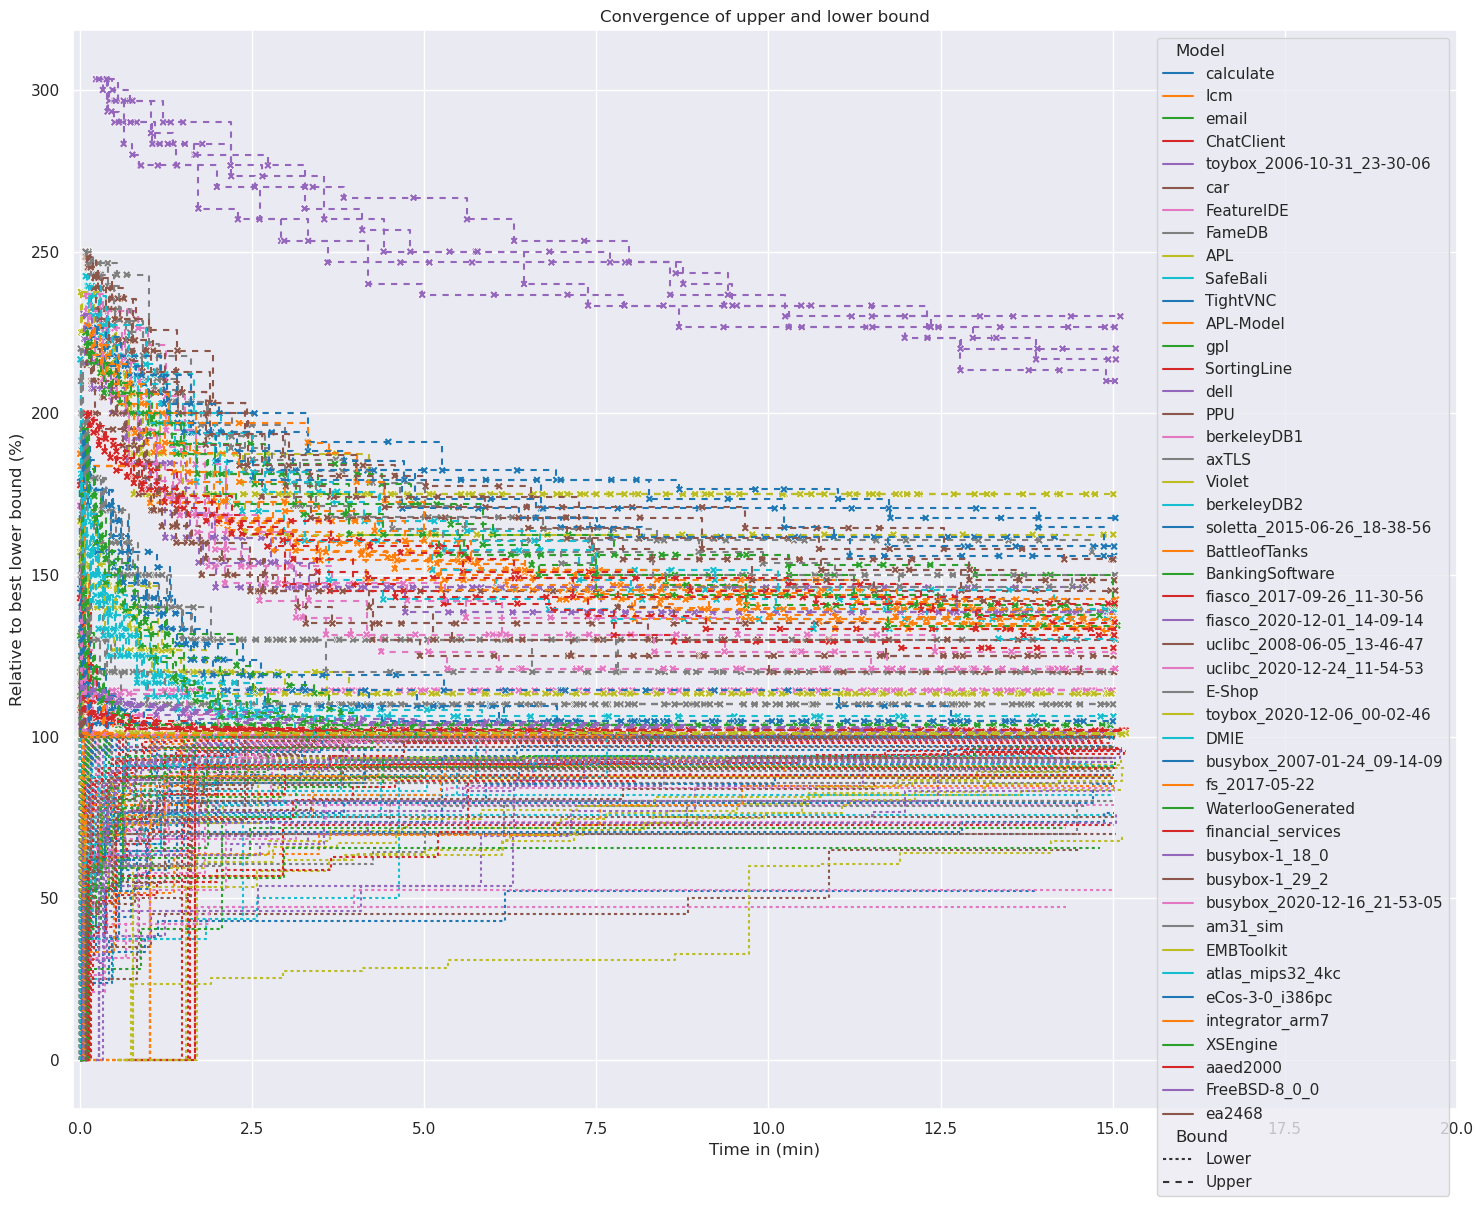

In [12]:
plt.figure(figsize=(15, 13))
plot_lb_ub_progress(t[t["instance"].isin(solved_instances)], plt.gca(), xmax=20)
plt.tight_layout()
plt.show()

### Every model with all its five runs.

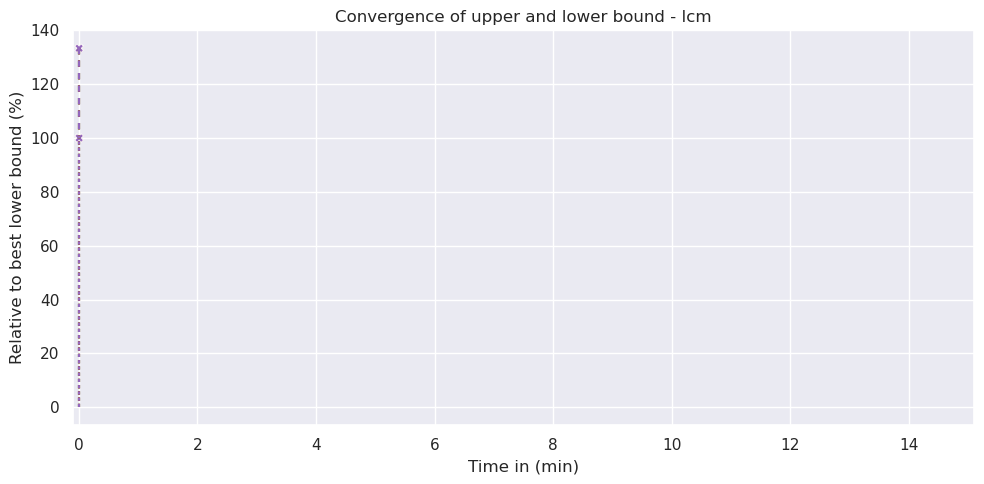

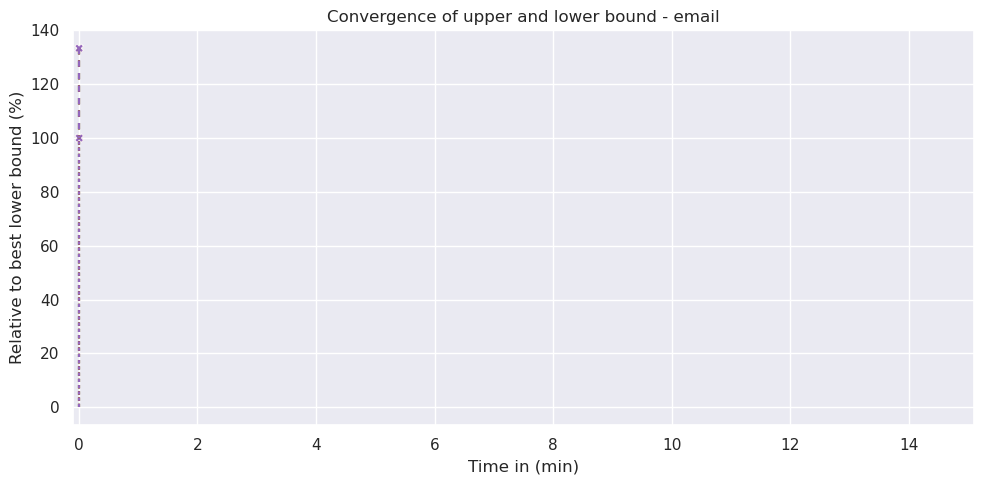

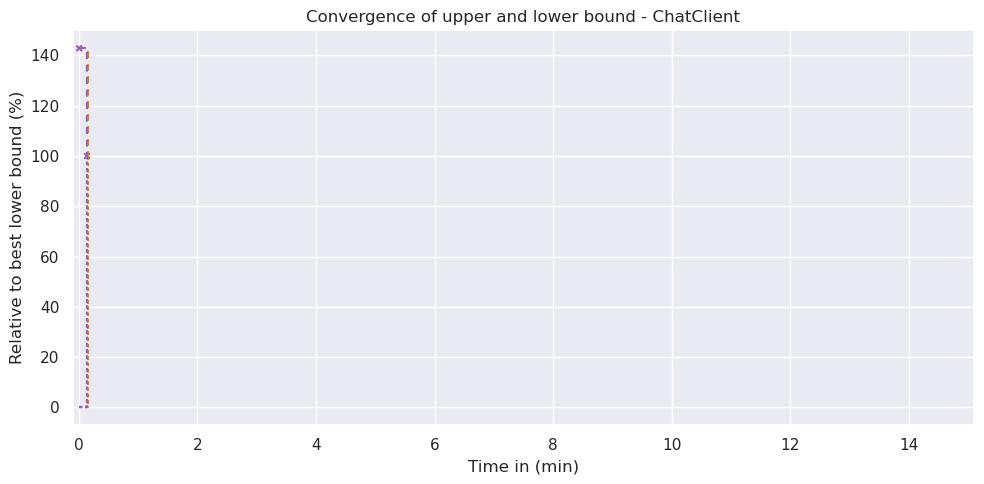

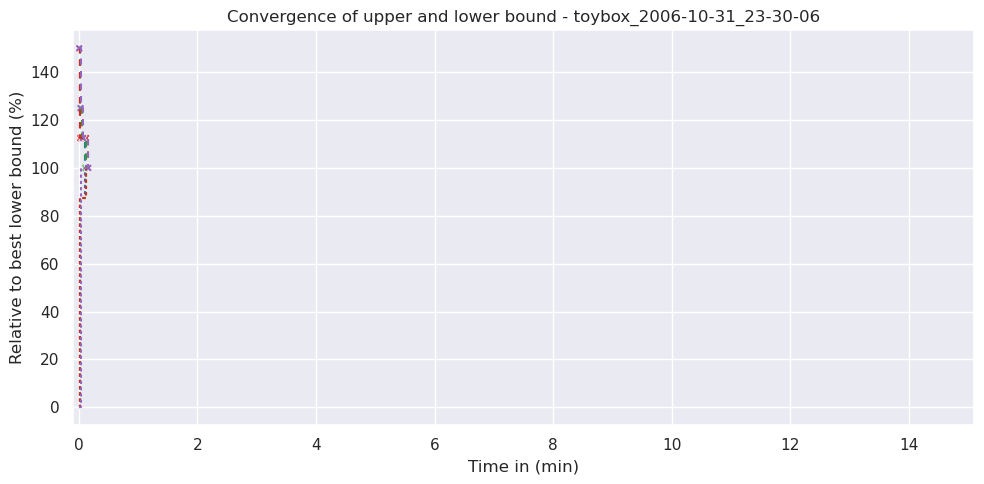

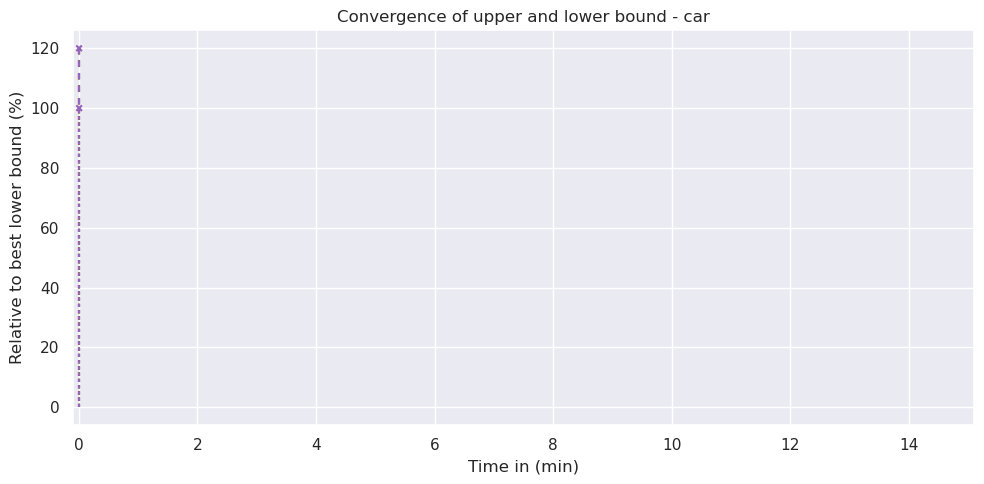

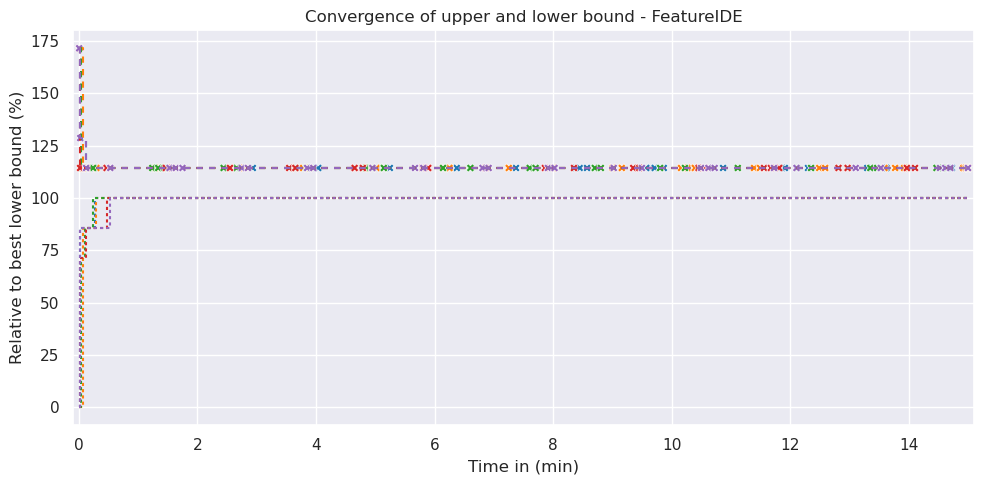

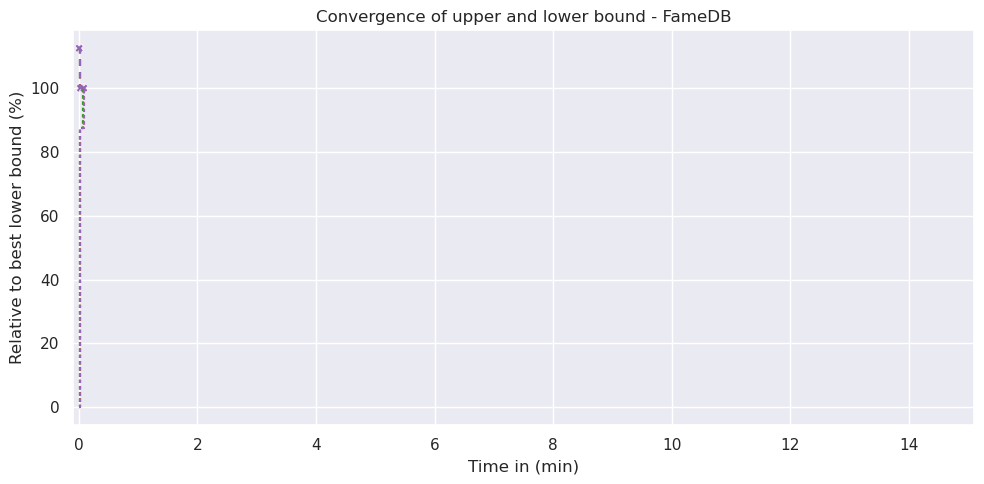

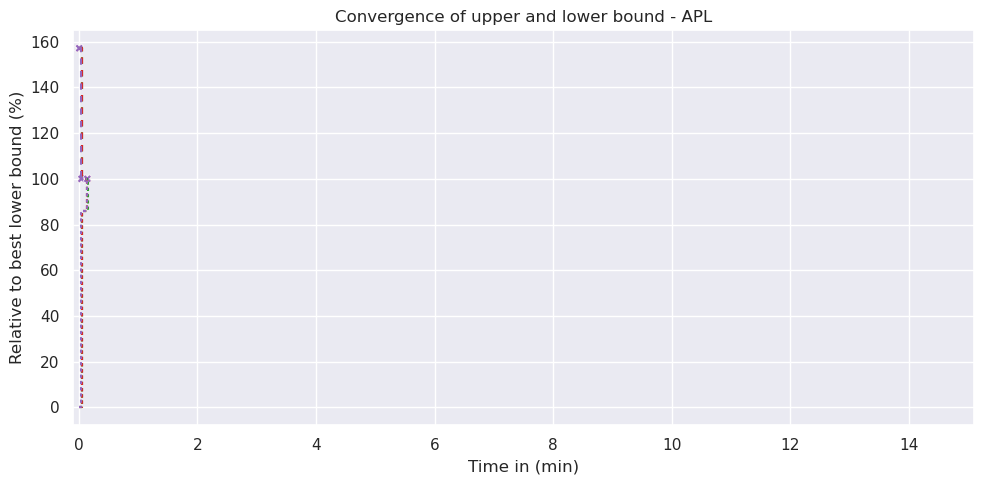

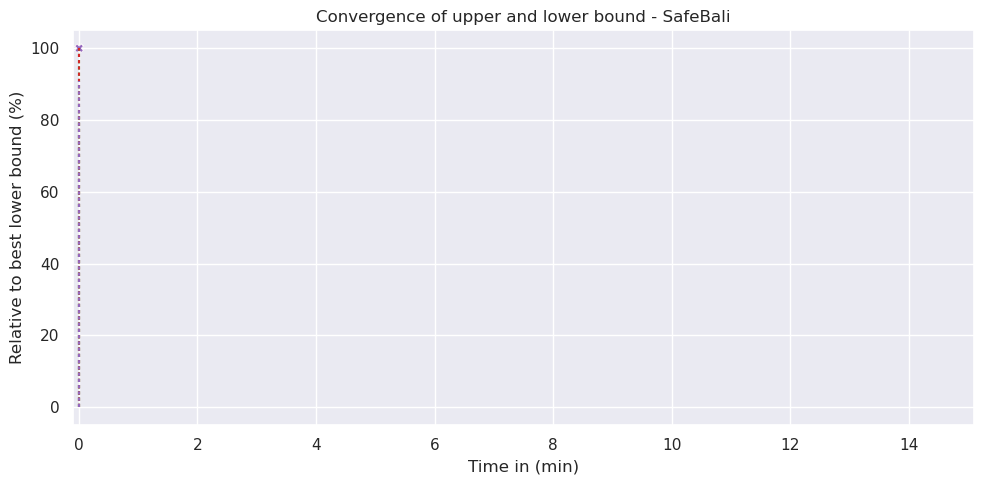

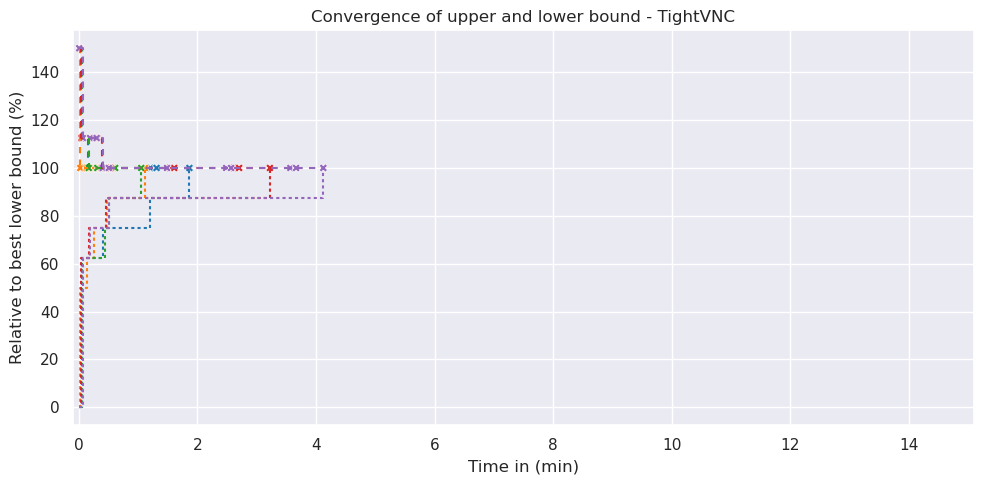

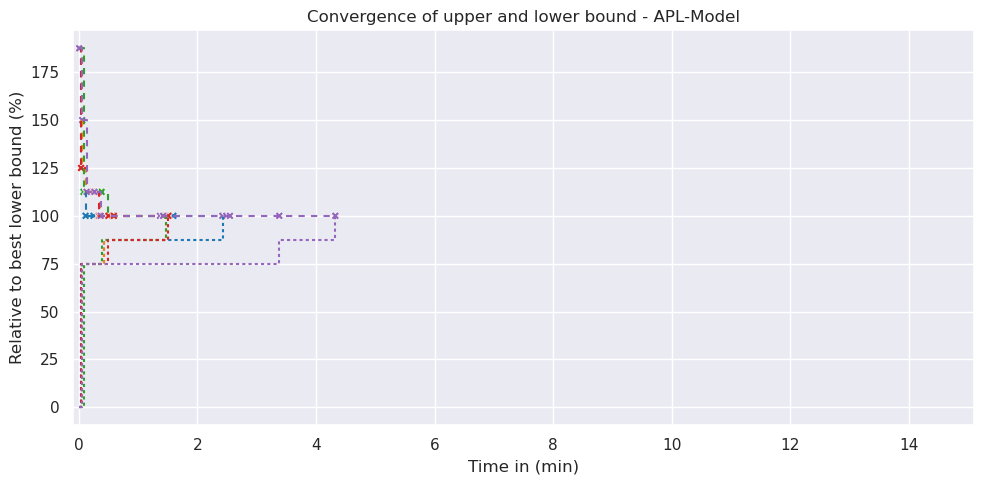

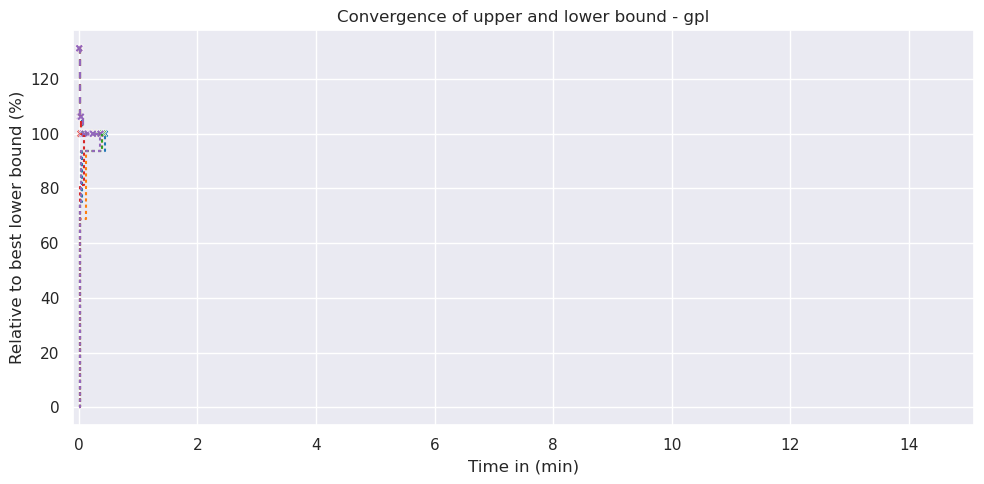

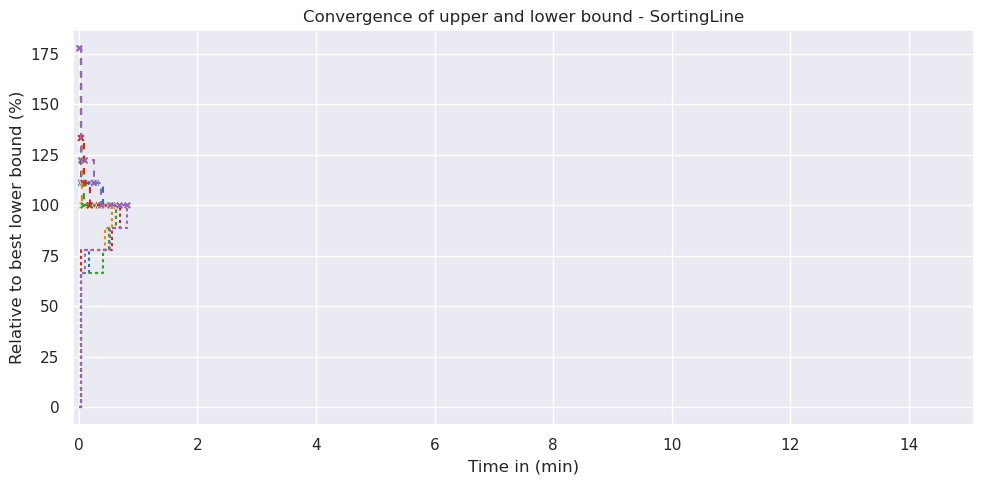

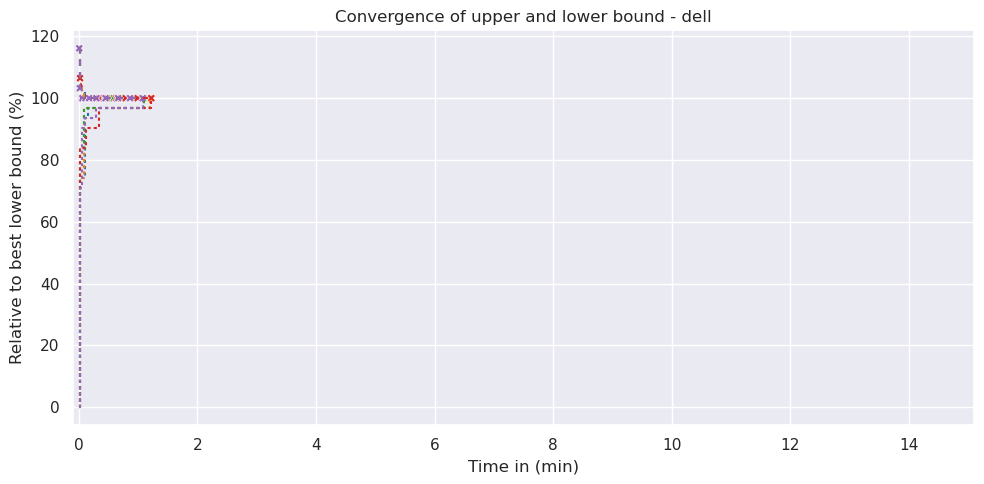

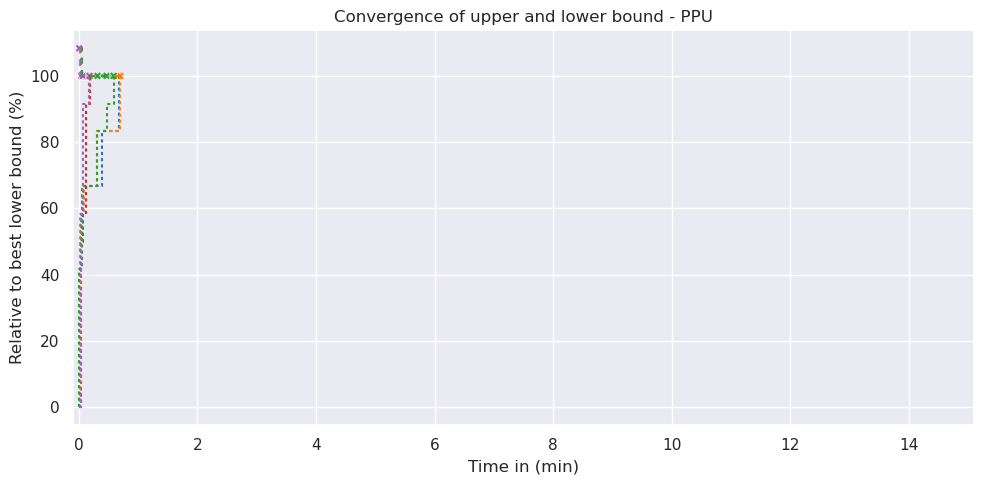

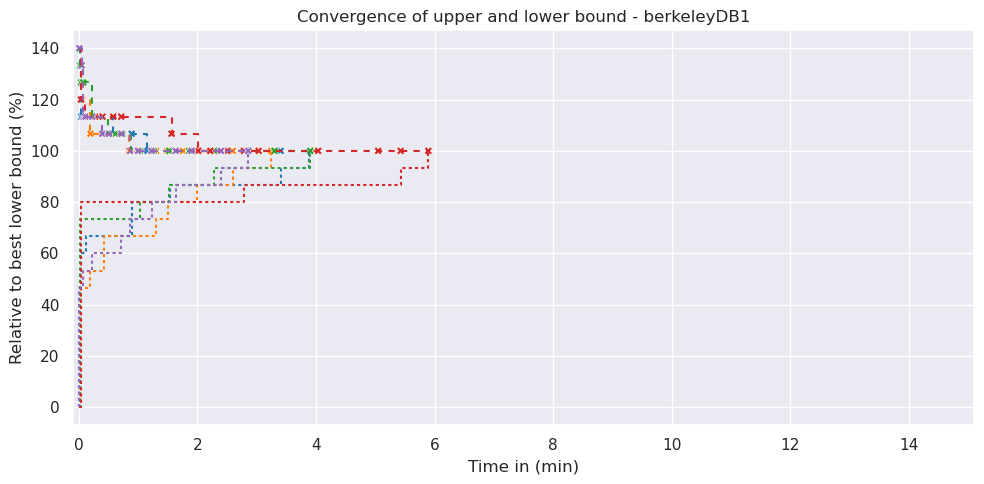

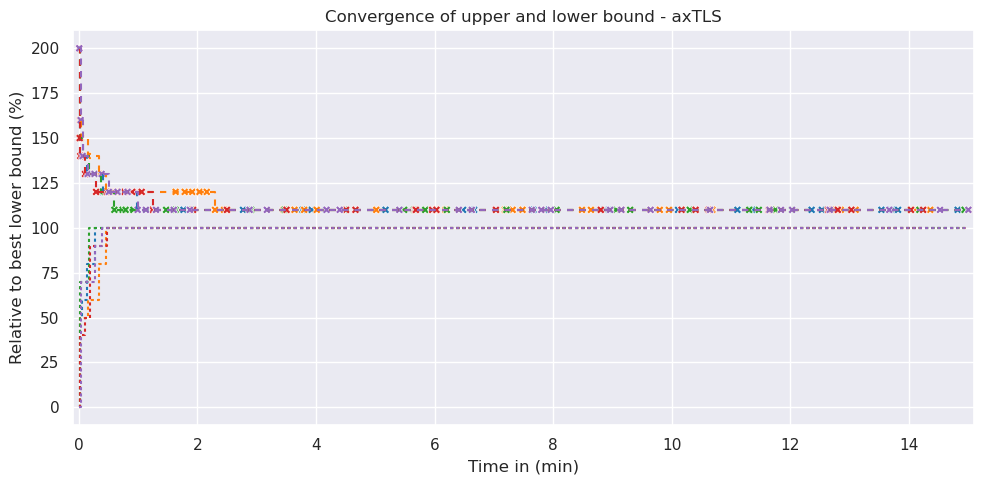

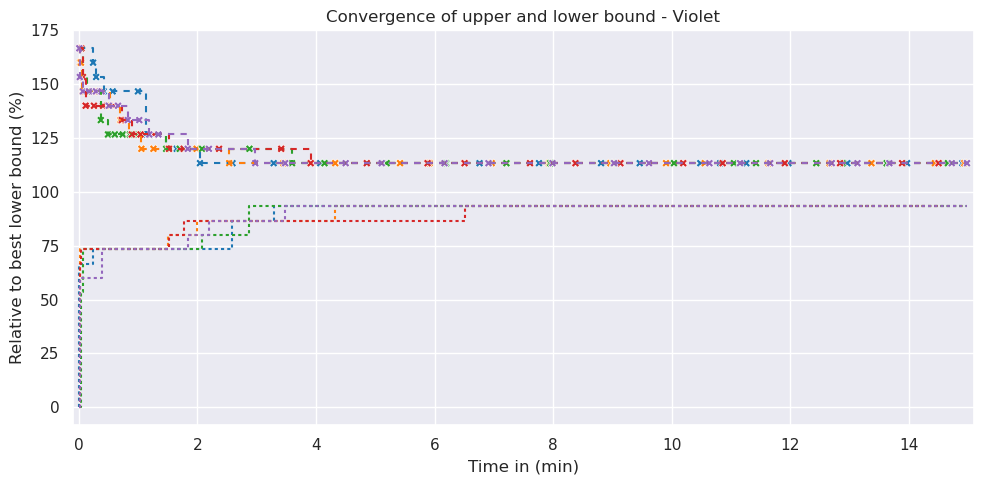

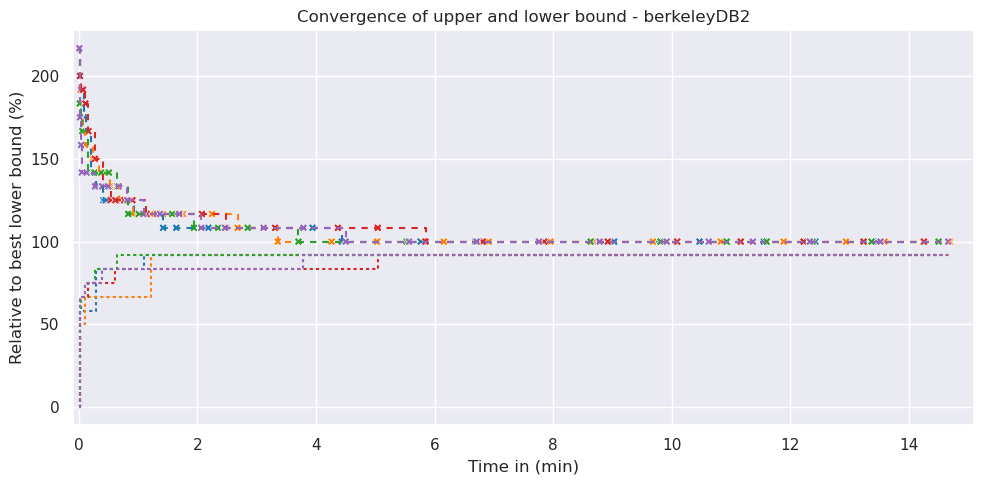

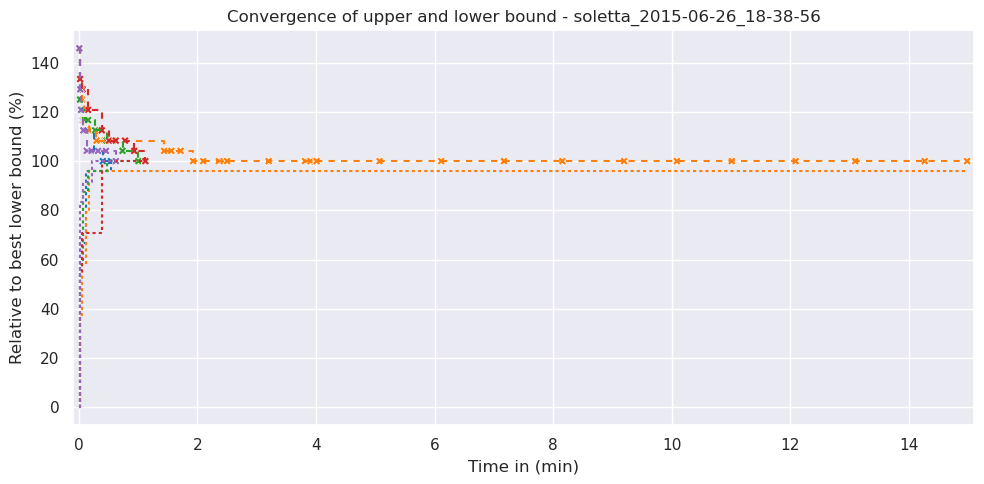

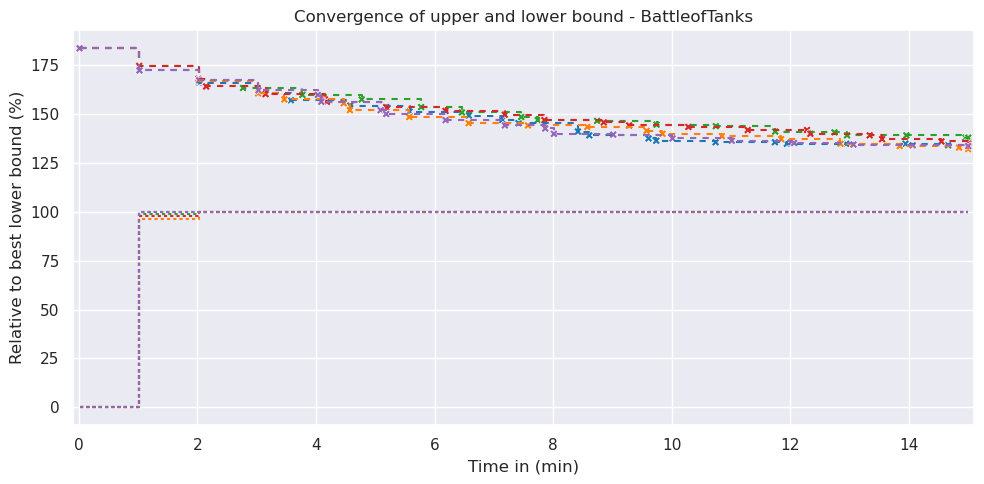

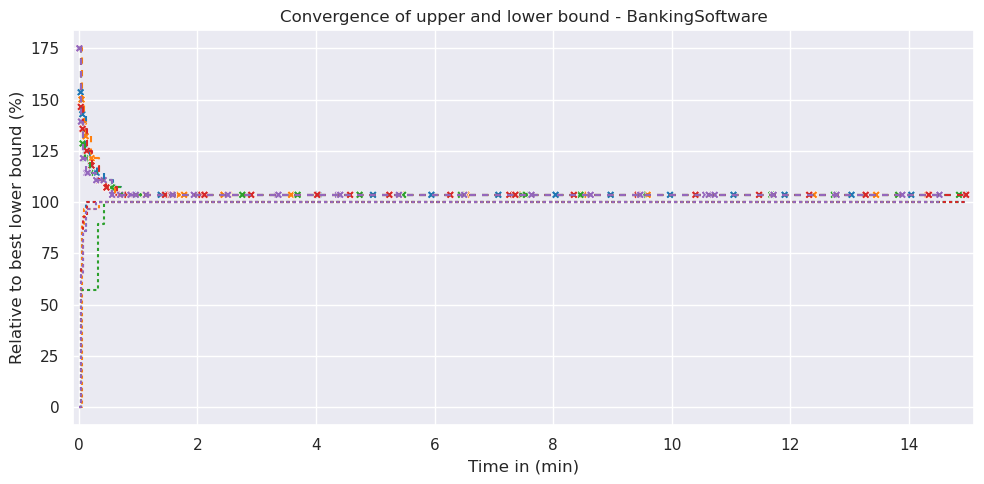

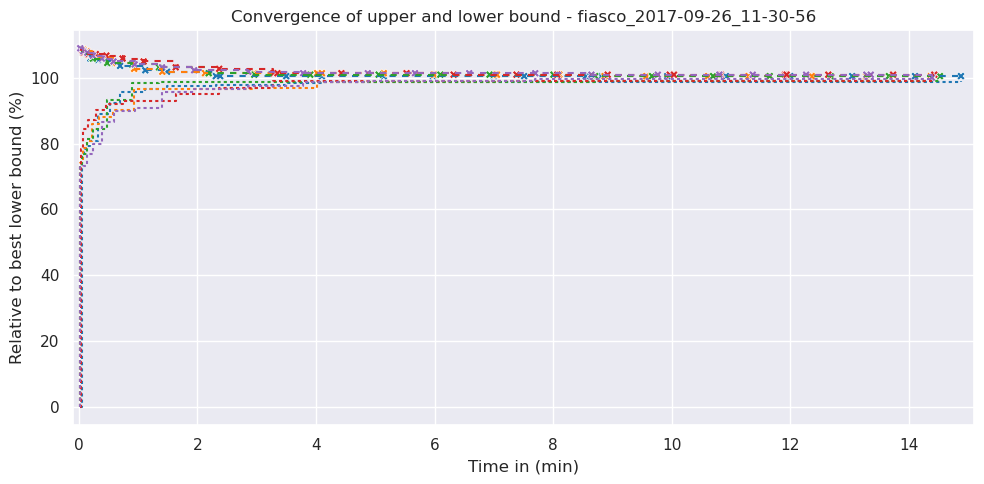

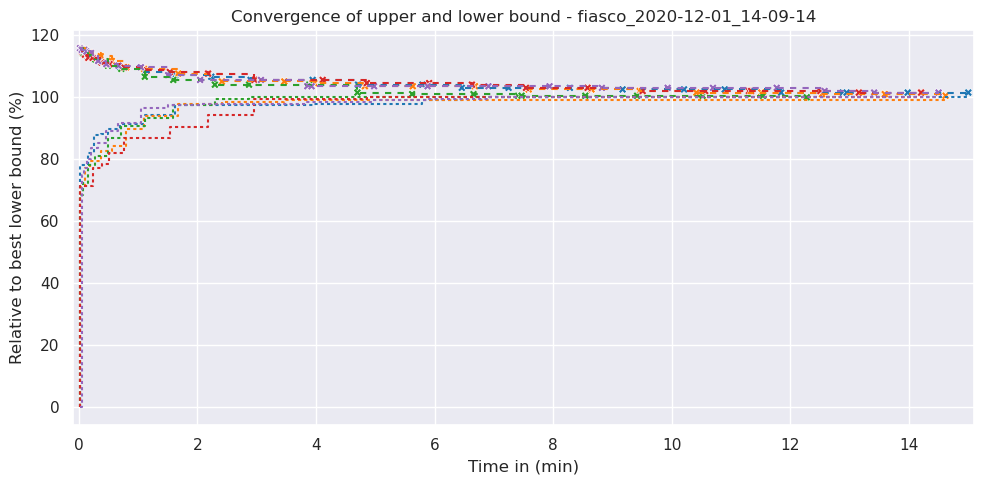

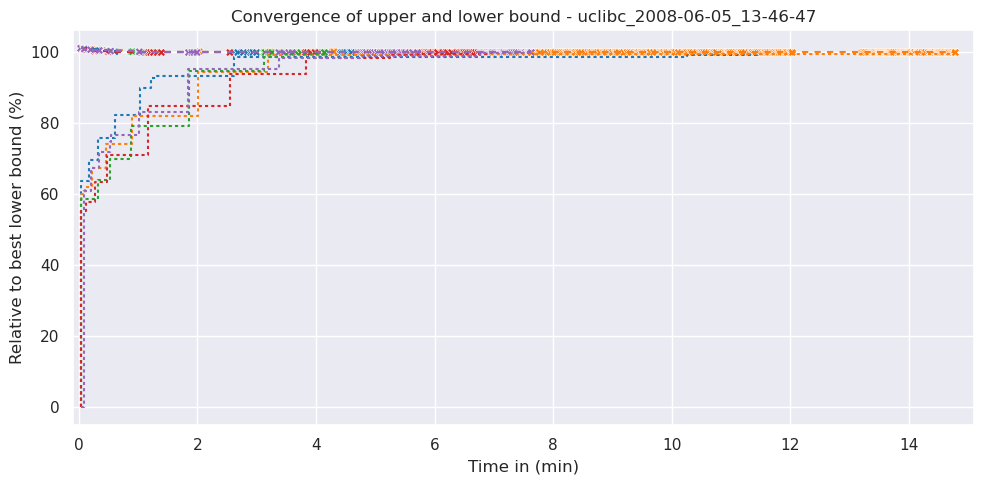

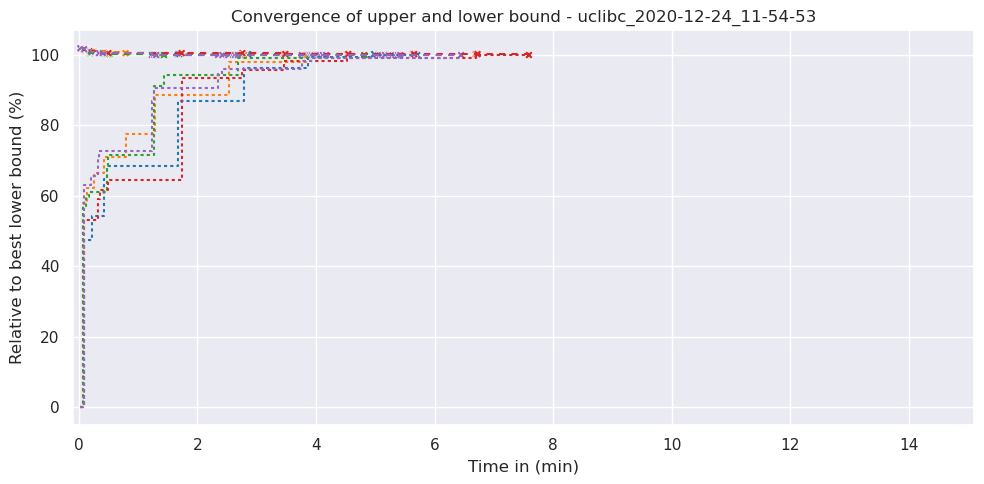

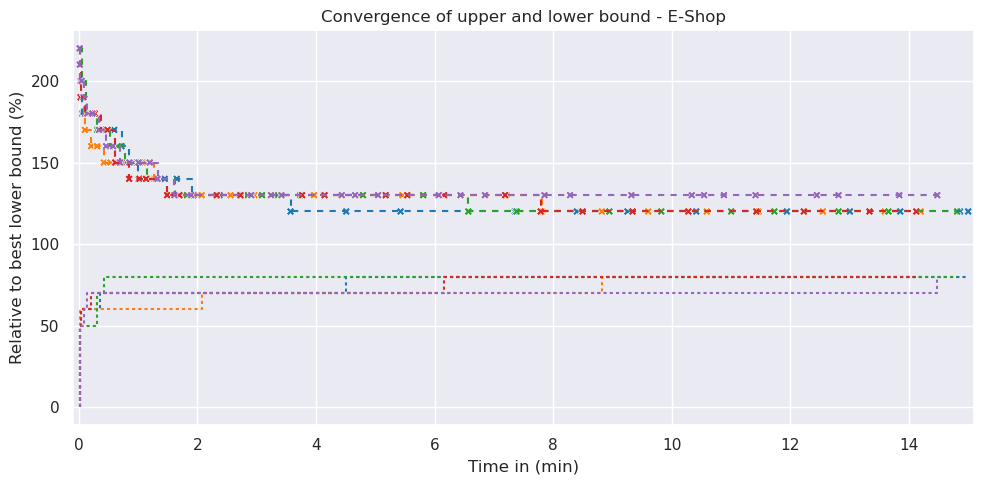

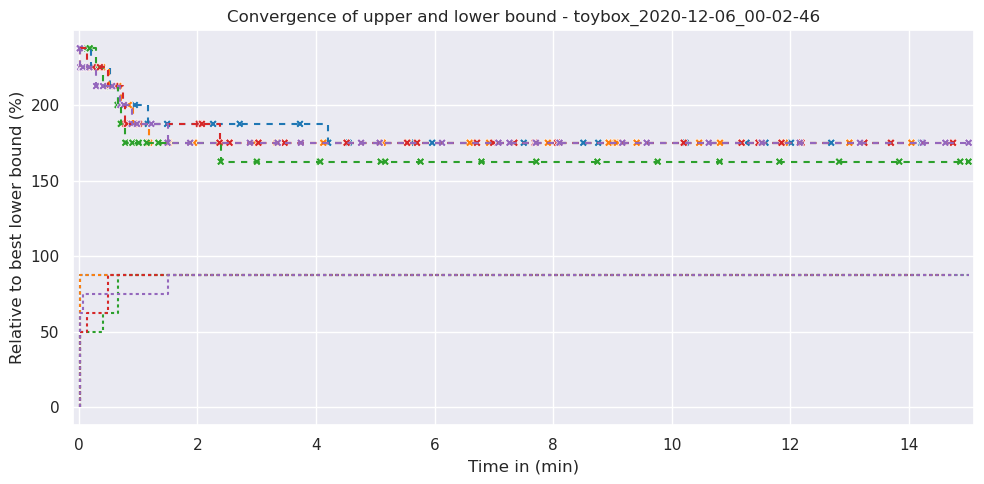

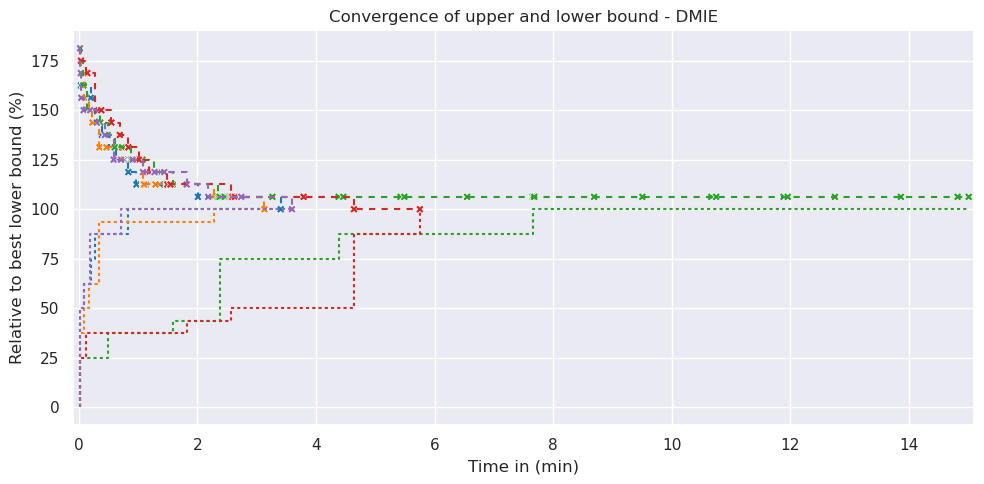

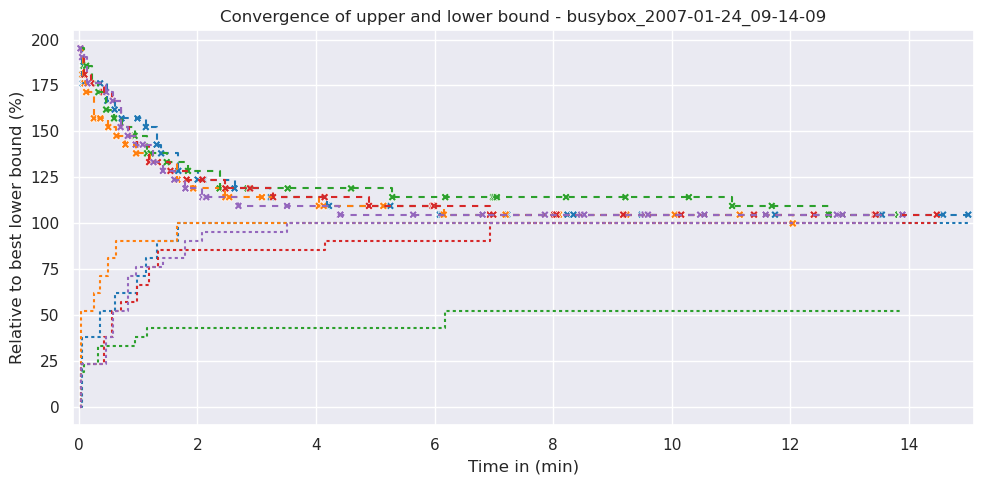

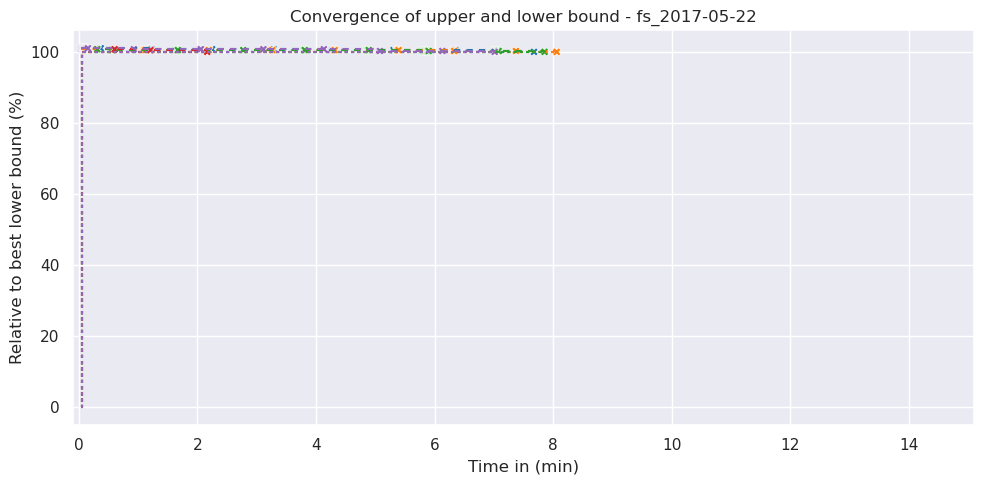

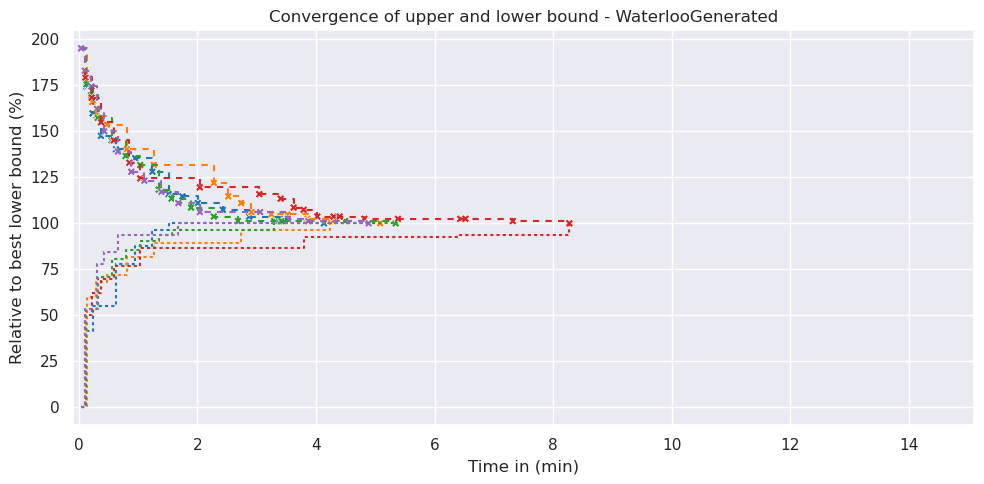

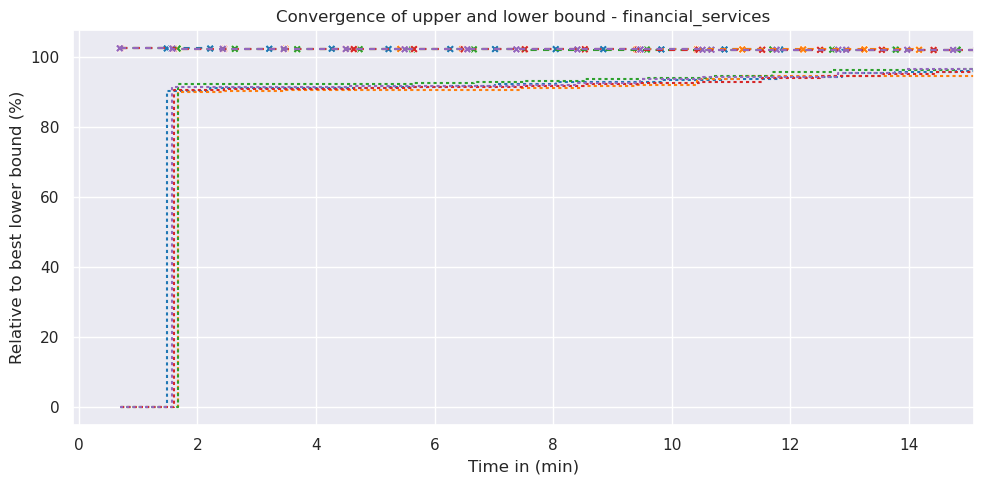

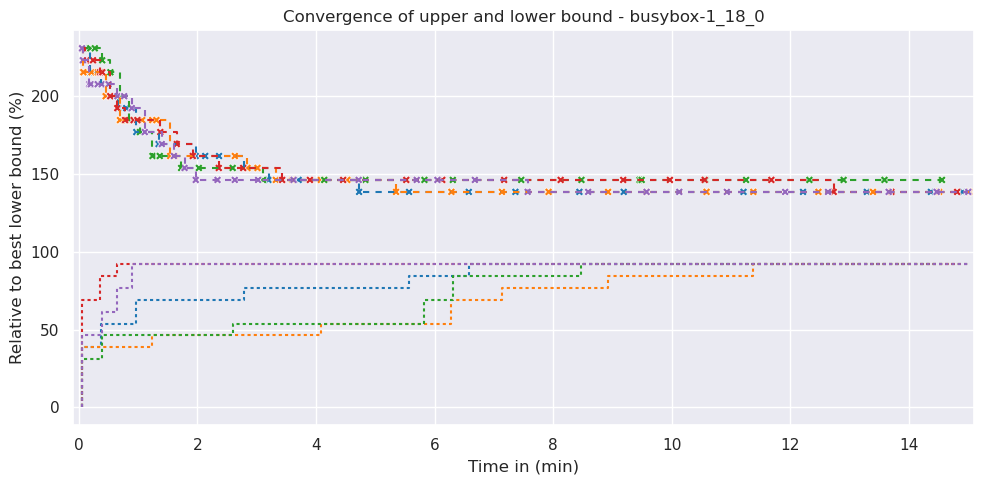

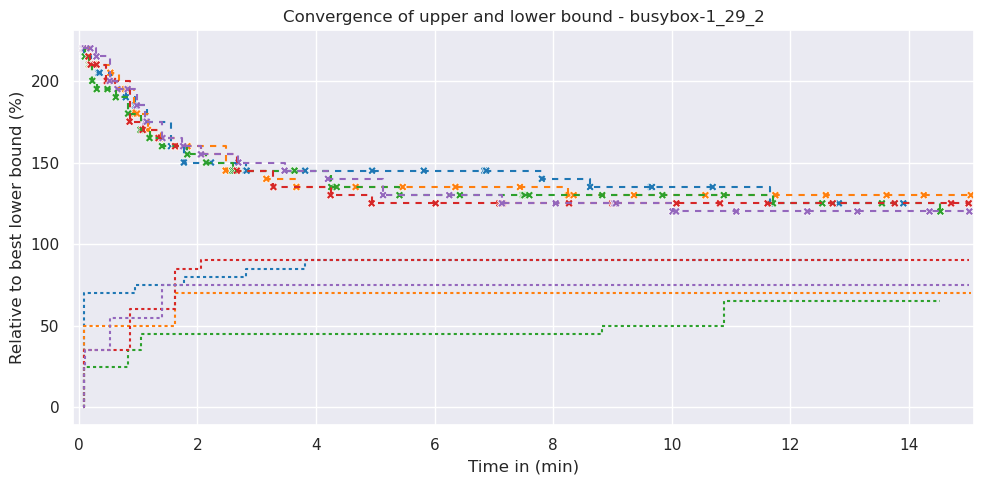

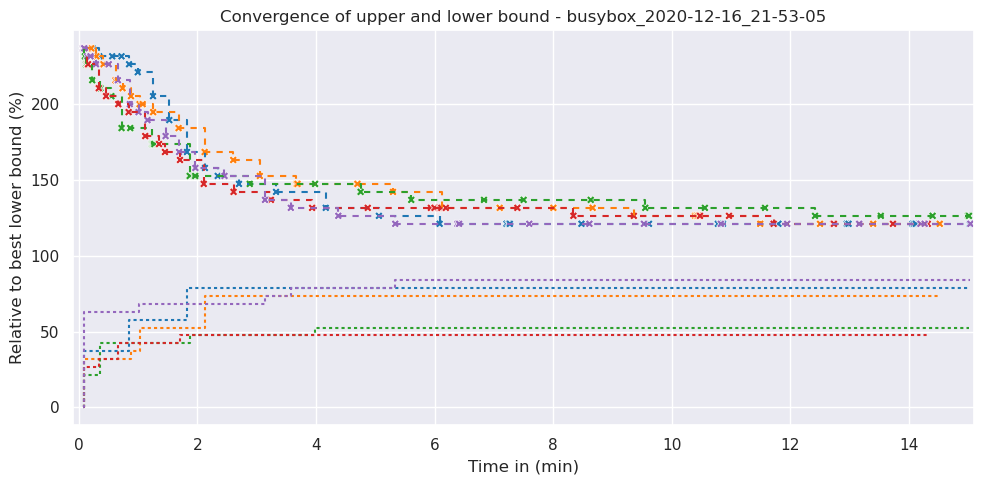

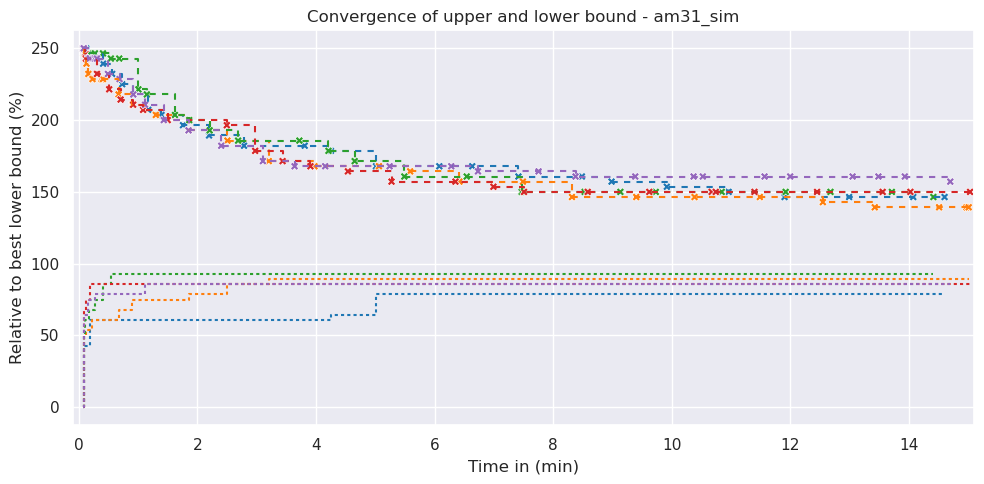

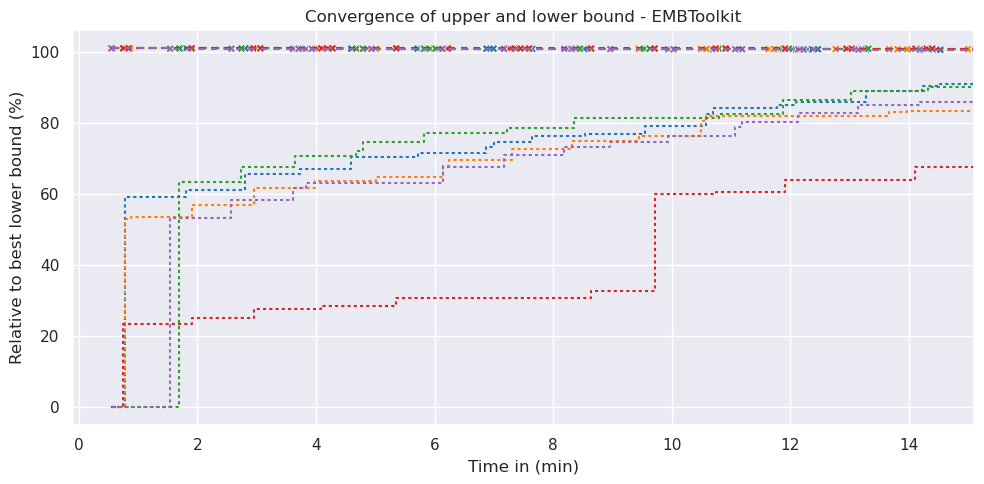

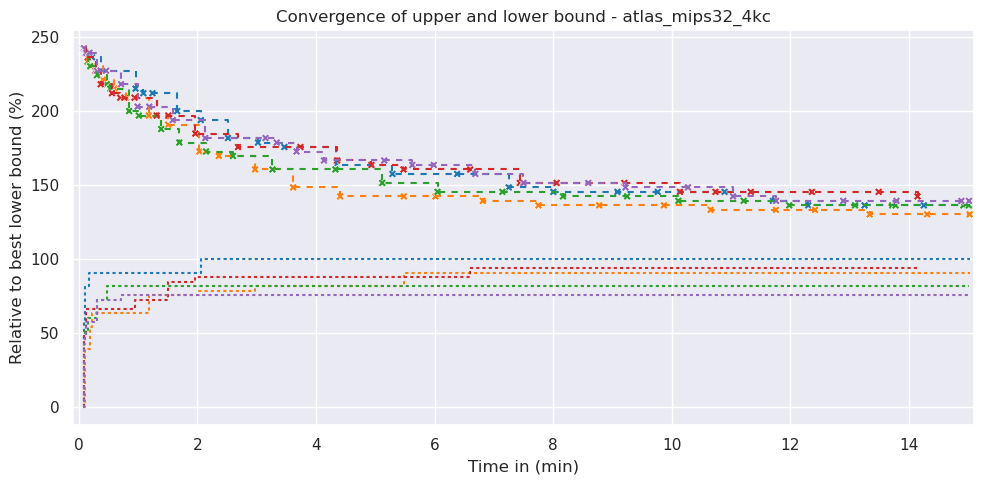

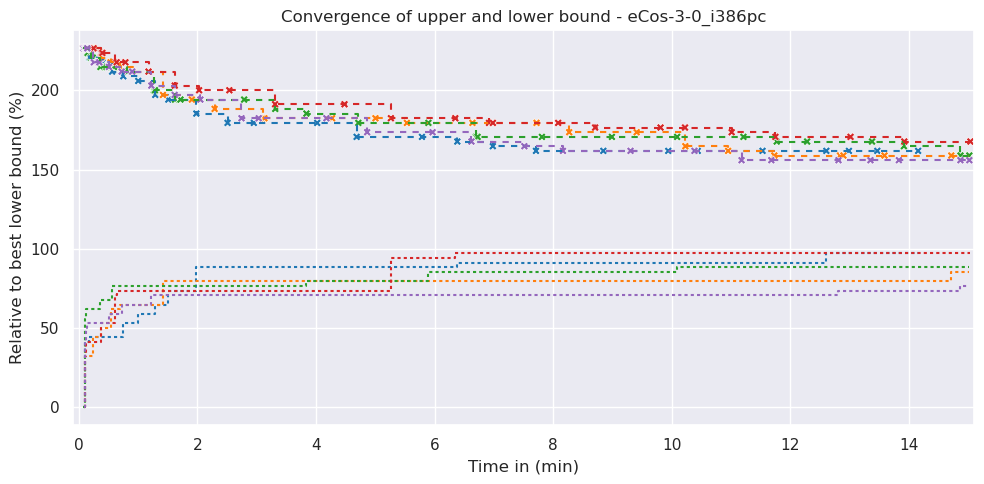

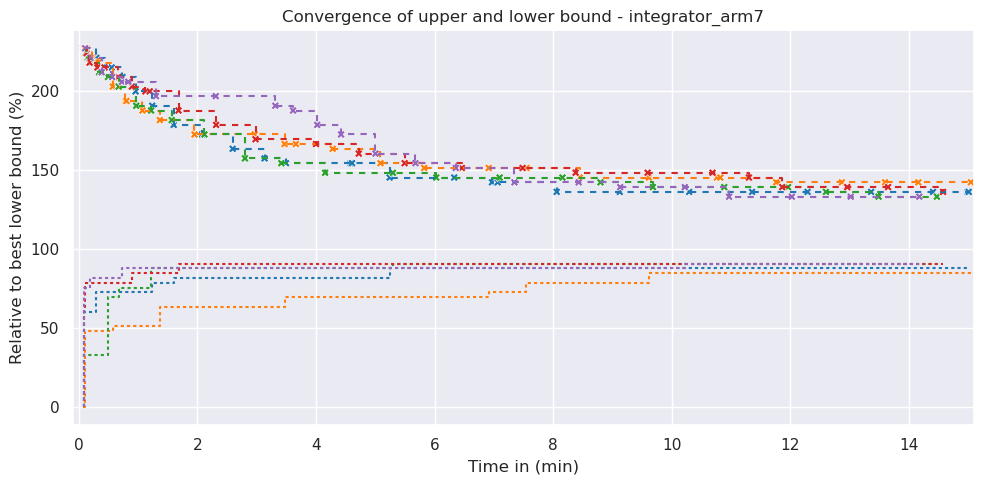

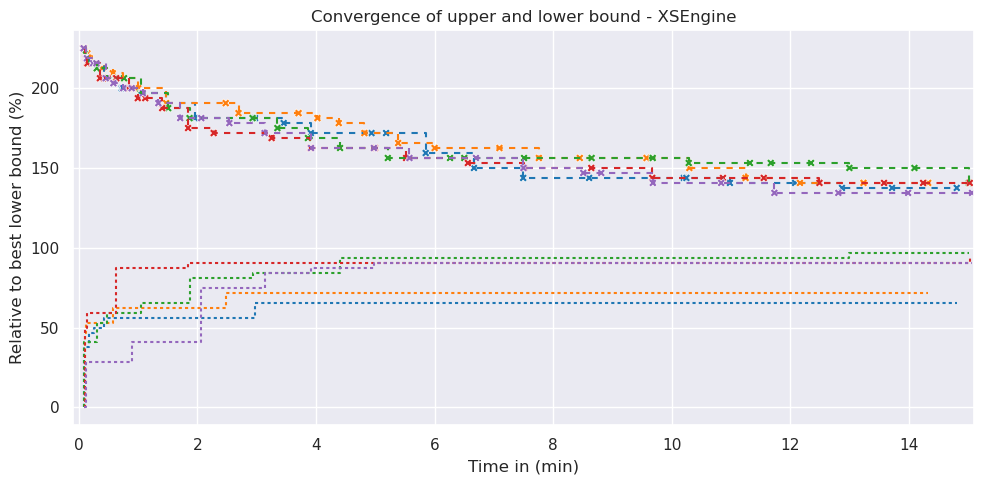

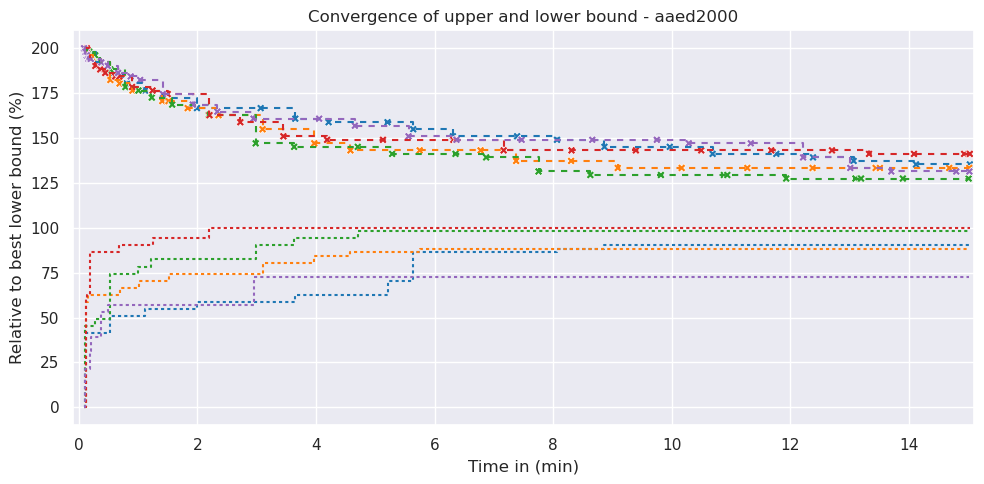

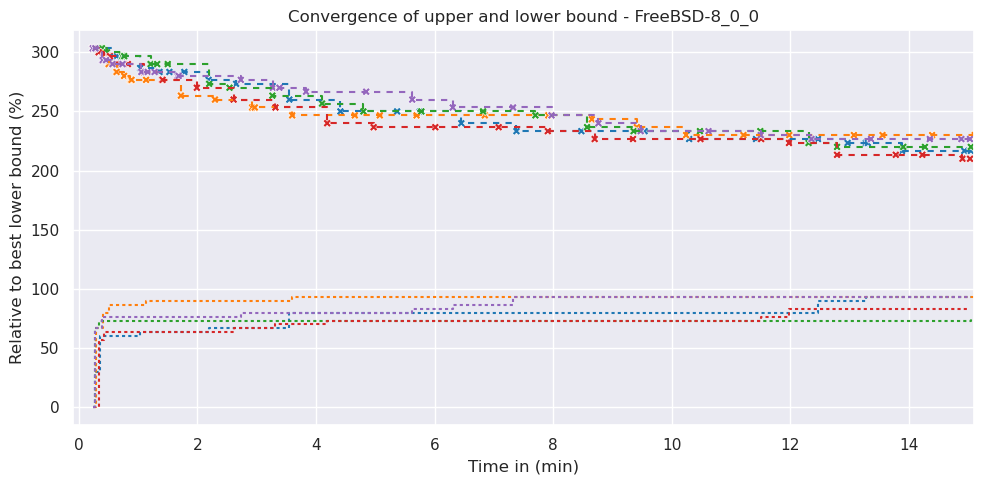

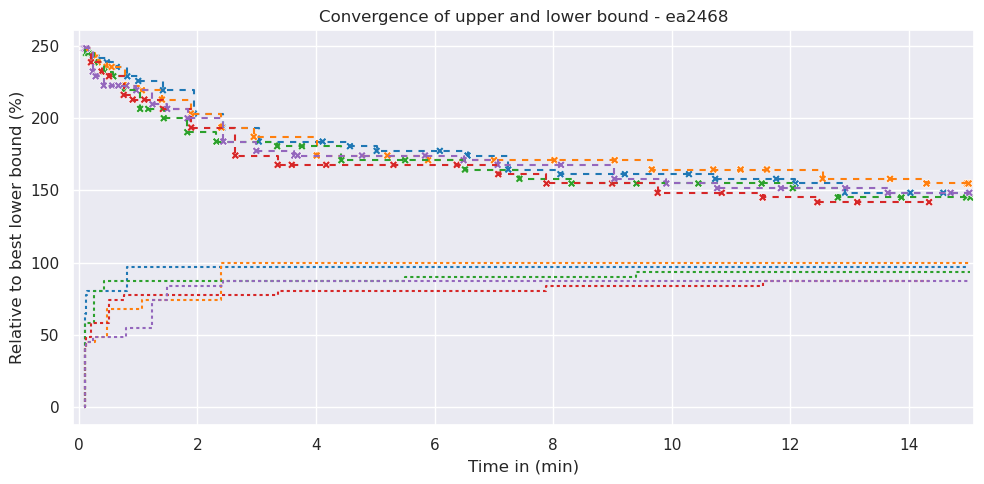

In [13]:
for i in range(1, len(solved_instances), 1):
    plt.figure(figsize=(10, 5))
    plot_lb_ub_progress(
        t[t["instance"].isin(solved_instances[i : i + 1])],
        plt.gca(),
        xmax=15.1,
        single_instance=True,
    )
    plt.tight_layout()
    plt.show()

## Looking onto a selection of instances in a single plot

In [14]:
ec = EventCollector()
selection = [
    "PPU",
    # small, optimal initial sample, no improvement, reached lower bound, progress within seconds + largest system for which an existing sampling algorithm is optimal
    "axTLS",
    # small, bad initial sample, large improvement, tight lower bound, progress for 0/1 min + smallest system that we cannot optimally solve
    "berkeleyDB2",
    # small, bad initial sample, large improvement, reached lower bound, progress for 6/3 min + one of the most significant improvements (43% + optimal afterwards)
    "fs_2017-05-22",
    # medium, good initial sample, small improvement, tight lower bound, progress for 0/10 min + smallest improvement (near-optimal sample still improved)
    "busybox_2020-12-16_21-53-05",
    # medium, bad initial sample, improvement over ~6 minutes, quick progress on lb.
    "FreeBSD-8_0_0"
    # medium, bad initial sample, large improvement, far lower bound, progress for 15/15 min + system with the largest remaining gap between LB=30 and sample=59 (almost 100%)
]
data[data["instance_name"].isin(selection)].sample(frac=1).drop_duplicates(
    subset=["instance_name"], keep="first"
).sort_values(by=["num_vars", "num_clauses"]).apply(ec, axis=1)
t_selected = pd.DataFrame(ec.events)
t_selected["instance"] = t_selected["instance"].apply(lambda s: s[:15])

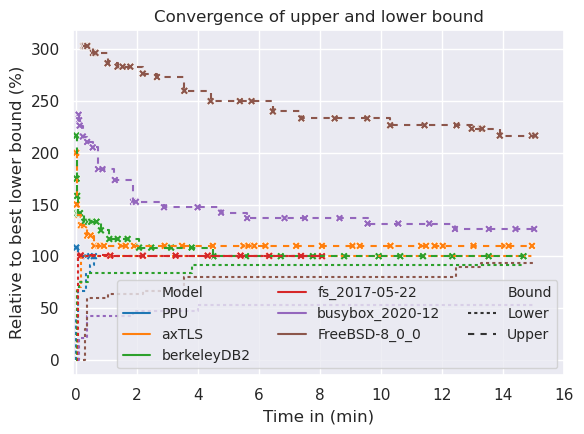

In [15]:
plt.figure(figsize=(6, 4.5))
plot_lb_ub_progress(t_selected, plt.gca(), xmax=16)
plt.legend(ncols=3, loc="lower right", prop={"size": 10})
plt.tight_layout()
plt.savefig("./plots/01_12_convergence_of_selected_models.pdf")
plt.show()

## Time of last change

To get a better grasp of the necessary time.

In [16]:
time_until_last_change = (
    t[t["final"] & (t["instance"].isin(solved_instances))]
    .groupby(["instance", "path", "type"])[["time"]]
    .min()
    .reset_index()
    .groupby(["instance", "type"])[["time"]]
    .mean()
)
time_until_last_change

time
instance                   type           
APL                        Lower  0.141174
                           Upper  0.045761
APL-Model                  Lower  2.242454
                           Upper  0.331337
BankingSoftware            Lower  0.262543
...                                    ...
toybox_2020-12-06_00-02-46 Upper  2.329406
uclibc_2008-06-05_13-46-47 Lower  7.073352
                           Upper  2.231205
uclibc_2020-12-24_11-54-53 Lower  5.353934
                           Upper  3.418512

[92 rows x 1 columns]

In [17]:
(time_until_last_change.groupby("instance")[["time"]].max() < 3).sum()

time    20
dtype: int64

In [18]:
time_until_last_change.reset_index().groupby("type")[["time"]].mean()

time
type           
Lower  3.533198
Upper  5.180616